In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [26]:
df=pd.read_csv('data/emotion_dataset_2.csv')

(<AxesSubplot:xlabel='Emotion', ylabel='count'>,
 joy         11045
 sadness      6723
 neutral      6254
 fear         5410
 disgust      5356
 shame        5150
 anger        4297
 surprise     4062
 Name: Emotion, dtype: int64)

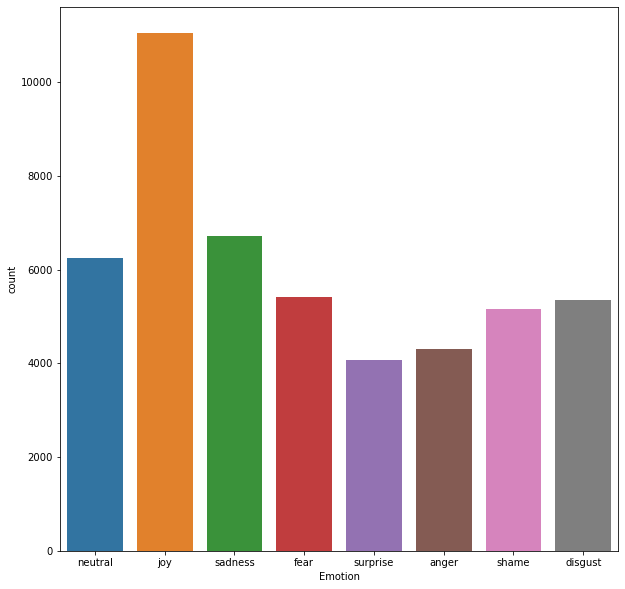

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x='Emotion',data=df),df['Emotion'].value_counts()

In [28]:
shame=df[df.Emotion=="shame"]
neutral=df[df.Emotion=="neutral"]
disgust=df[df.Emotion=="disgust"]

In [29]:
disgustaug=resample(disgust,replace=True,n_samples=4500,random_state=0)
neutralaug=resample(neutral,replace=True,n_samples=4000,random_state=0)
shameaug = resample(shame,replace=True,n_samples=5000,random_state=0)

In [30]:
df = pd.concat([df, disgustaug])

In [31]:
df = pd.concat([df, neutralaug])

In [32]:
df = pd.concat([df, shameaug])

In [7]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    471
dtype: int64

In [19]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
12649    y do females let ex's run them into a lonely a...
30032    I'm pretty sure I'm the only weirdo left in th...
22682    I can't take @carlybianchini disgusting conver...
12374    A reader , disgruntled in large proportion , s...
20394    That awkward moment when you walk into your li...
Name: Text, Length: 48297, dtype: object

In [34]:
df['Clean_text']=df['Text'].apply(nfx.remove_stopwords)
df['Clean_text']=df['Text'].apply(nfx.remove_userhandles)
df['Clean_text']=df['Text'].apply(nfx.remove_punctuations)

In [14]:
df

,Unnamed: 0,Emotion,Text,Clean_Text,Clean_text
0,0,neutral,Why ?,NaN,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,@Iluvmiasantos ugh babe hugggzzz for u babe ...
...,...,...,...,...,...
34793,34791,shame,I am ashamed,NaN,I am ashamed
19526,19526,shame,Do n't be embarrassed about lying on a bed in ...,nt embarrassed lying bed shop try sure test a...,Do nt be embarrassed about lying on a bed in t...
15702,15702,shame,"` You 'll not be alone with him , Maggie , he ...",ll Maggie s got sister case Mitch Richie...,You ll not be alone with him Maggie he s go...
7414,7414,shame,"On this occasion , satygraha involved imprison...",occasion satygraha involved imprisonment thou...,On this occasion satygraha involved imprisonm...


In [35]:
x=df['Clean_text']
y=df['Emotion']

In [36]:
cv = CountVectorizer()
X=cv.fit_transform(x)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [126]:
def predictedinfo(text,model):
    vect = cv.transform(text).toarray()
    pred = model.predict(vect)
    prob = model.predict_proba(vect)
    predp=dict(zip(model.classes_,prob[0]))
    print("text recieved:{},predicted emotion:{} ,score{}".format(text,pred[0],np.max(prob)))
    return predp

In [ ]:
tenc=[""]

In [ ]:
predictedinfo(tenc,model)

In [41]:
linmodel=LogisticRegression()

In [ ]:
linmodel.fit(X_train,y_train)

In [43]:
linmodel.score(X_test,y_test)

0.7425120772946859

In [131]:
tenc=[""]

Naive base Metrics

In [ ]:
predictnaive=model.predict(X_test)

In [79]:
recall_score(y_test,predictnaive,average='macro')

0.62433859773682

In [78]:
model.score(X_test,y_test)

0.6596273291925466

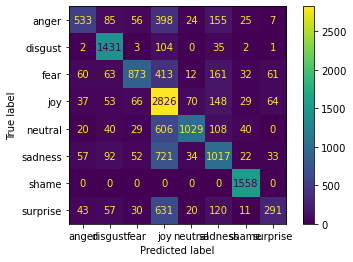

In [83]:
plot_confusion_matrix(model,X_test,y_test)

LR Metrics

In [ ]:
predictlen=linmodel.predict(X_test)

In [81]:
recall_score(y_test,predictlen,average='micro')

0.7425120772946859

In [82]:
linmodel.score(X_test,y_test)

0.7425120772946859

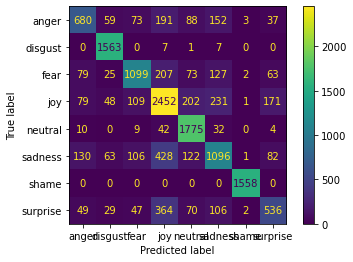

In [84]:
plot_confusion_matrix(linmodel,X_test,y_test)